# Task
Analyze the 'nutrients_csvfile.csv' file by performing PCA to identify key nutrient components and clustering food items into dietary groups, then summarize the findings and visualize the results.

In [2]:
import pandas as pd

df = pd.read_csv('nutrients_csvfile.csv')
print(df.head())
print(df.info())

                    Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
0             Cows' milk   1 qt.    976      660      32  40      36     0   
1              Milk skim   1 qt.    984      360      36   t       t     0   
2             Buttermilk   1 cup    246      127       9   5       4     0   
3  Evaporated, undiluted   1 cup    252      345      16  20      18     0   
4         Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   

  Carbs        Category  
0    48  Dairy products  
1    52  Dairy products  
2    13  Dairy products  
3    24  Dairy products  
4   119  Dairy products  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5  

In [3]:
import numpy as np

numeric_columns = ['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']

for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace('t', '0', regex=False).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      335 non-null    object 
 1   Measure   335 non-null    object 
 2   Grams     335 non-null    int64  
 3   Calories  333 non-null    float64
 4   Protein   335 non-null    int64  
 5   Fat       334 non-null    float64
 6   Sat.Fat   333 non-null    float64
 7   Fiber     334 non-null    float64
 8   Carbs     335 non-null    float64
 9   Category  335 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 26.3+ KB
None


In [4]:
from sklearn.preprocessing import StandardScaler

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
print(df_scaled.head())

      Grams  Calories   Protein       Fat   Sat.Fat     Fiber     Carbs
0  6.014582  2.562577  1.323011  1.590573  1.603595 -0.148225  0.643317
1  6.072360  0.929352  1.548907 -0.433434 -0.349259 -0.148225  0.755113
2  0.742358 -0.339119  0.024107 -0.180434 -0.132275 -0.148225 -0.334895
3  0.785692  0.847691  0.419426  0.578569  0.627168 -0.148225 -0.027457
4  9.214027  6.444207  4.542034  1.691773  0.898398 -0.060890  2.627689


In [6]:
from sklearn.decomposition import PCA

pca_3 = PCA(n_components=3)

df_pca_3 = pca_3.fit_transform(df_scaled)

df_pca_3 = pd.DataFrame(data=df_pca_3, columns=['PC1', 'PC2', 'PC3'])

print(df_pca_3.head())

print(pca_3.explained_variance_ratio_)

print(pca_3.explained_variance_ratio_.sum())

loadings = pd.DataFrame(
    pca_3.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=numeric_columns
)

print(loadings)

        PC1       PC2       PC3
0  3.647660  4.295475 -1.267461
1  1.531427  4.373891 -3.307932
2 -0.286114  0.180795 -0.618177
3  0.996676  0.612474  0.318642
4  6.864365  8.967412 -1.725967
[0.5418056  0.22813731 0.10109047]
0.8710333713288054
               PC1       PC2       PC3
Grams     0.130731  0.568171 -0.540250
Calories  0.257307  0.535884  0.611668
Protein   0.456824 -0.092793 -0.270471
Fat       0.457939 -0.213924  0.299825
Sat.Fat   0.467099 -0.233131  0.172114
Fiber     0.443405 -0.228351 -0.371805
Carbs     0.288991  0.478688 -0.055493


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []

k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca_3) 
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(df_pca_3, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None) 

print("Inertia values:", inertia)
print("Silhouette scores (for k > 1):")
print([s for s in silhouette_scores if s is not None])

Inertia values: [2042.5732557660485, 1164.3526187590617, 770.0809790313515, 585.3878110669636, 461.0442741992495, 348.02404298638487, 276.31110580696964, 211.69081539474118, 182.60014005257796, 154.9823450960626]
Silhouette scores (for k > 1):
[0.8885591678638892, 0.6991640463993958, 0.44674988172899627, 0.43428500620338895, 0.42898456460008855, 0.4317933443534936, 0.4281163606482558, 0.4324263564981301, 0.4077834638799299]


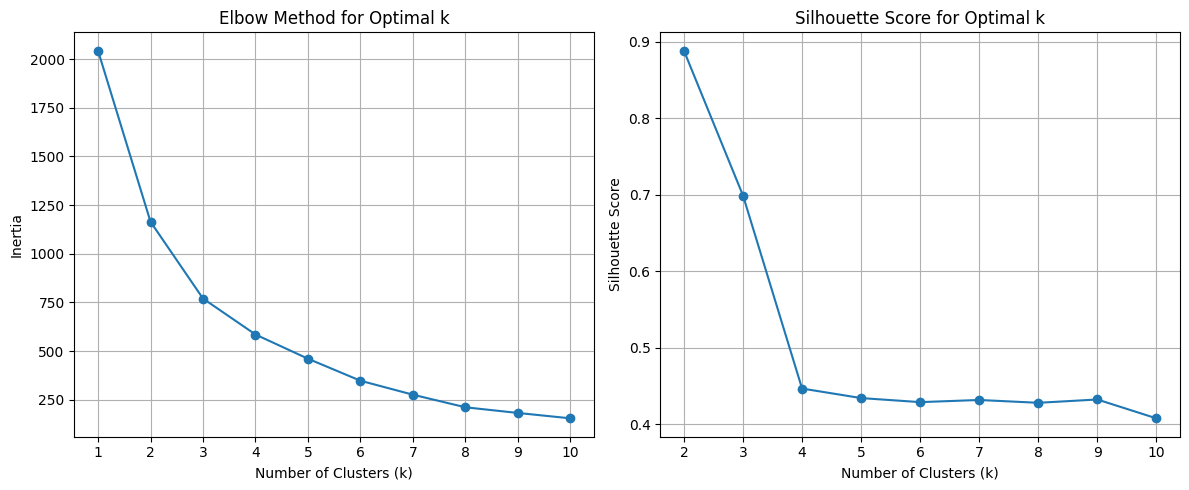

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range[1:])
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init='auto')

kmeans_optimal.fit(df_pca_3)

cluster_labels = kmeans_optimal.predict(df_pca_3)

df['Cluster'] = cluster_labels

print("First 5 rows of the DataFrame with assigned clusters:")
print(df.head())

print("\nCluster distribution:")
print(df['Cluster'].value_counts())

First 5 rows of the DataFrame with assigned clusters:
                    Food Measure  Grams  Calories  Protein   Fat  Sat.Fat  \
0             Cows' milk   1 qt.    976     660.0       32  40.0     36.0   
1              Milk skim   1 qt.    984     360.0       36   0.0      0.0   
2             Buttermilk   1 cup    246     127.0        9   5.0      4.0   
3  Evaporated, undiluted   1 cup    252     345.0       16  20.0     18.0   
4         Fortified milk  6 cups   1419    1373.0       89  42.0     23.0   

   Fiber  Carbs        Category  Cluster  
0    0.0   48.0  Dairy products        2  
1    0.0   52.0  Dairy products        2  
2    0.0   13.0  Dairy products        0  
3    0.0   24.0  Dairy products        0  
4    1.4  119.0  Dairy products        2  

Cluster distribution:
Cluster
0    316
2     18
1      1
Name: count, dtype: int64


In [10]:
cluster_characteristics = df.groupby('Cluster')[numeric_columns].mean()

print("Mean nutrient values for each cluster:")
print(cluster_characteristics)

Mean nutrient values for each cluster:
              Grams    Calories     Protein         Fat     Sat.Fat  \
Cluster                                                               
0        129.468354  159.327793    6.636076    6.226474    4.214800   
1        230.000000  231.000000  232.000000  233.000000  234.000000   
2        379.666667  713.000000   30.166667   37.166667   32.833333   

              Fiber       Carbs  
Cluster                          
0          0.767045   19.088924  
1        235.000000  236.000000  
2         17.700000  116.722222  


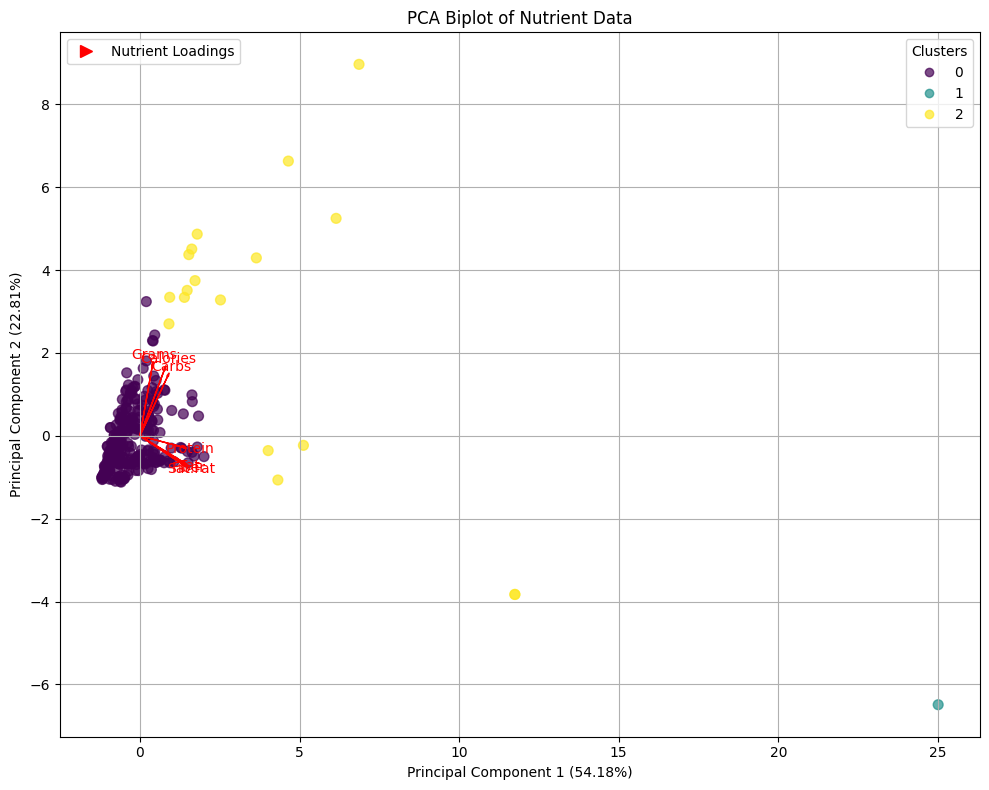

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

scatter = plt.scatter(df_pca_3['PC1'], df_pca_3['PC2'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7, label='Food Items')


for i, feature in enumerate(numeric_columns):
    plt.arrow(0, 0,
              loadings.loc[feature, 'PC1'] * scaling_factor,
              loadings.loc[feature, 'PC2'] * scaling_factor,
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(loadings.loc[feature, 'PC1'] * scaling_factor * 1.15,
             loadings.loc[feature, 'PC2'] * scaling_factor * 1.15,
             feature, color='red', ha='center', va='center')

plt.xlabel(f'Principal Component 1 ({pca_3.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca_3.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA Biplot of Nutrient Data')
plt.grid()

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

dummy_line = plt.Line2D([0], [0], linestyle='none', c='red', marker='>', markersize=8)
plt.legend([dummy_line], ['Nutrient Loadings'], numpoints=1, loc='upper left')

plt.tight_layout()
plt.show()

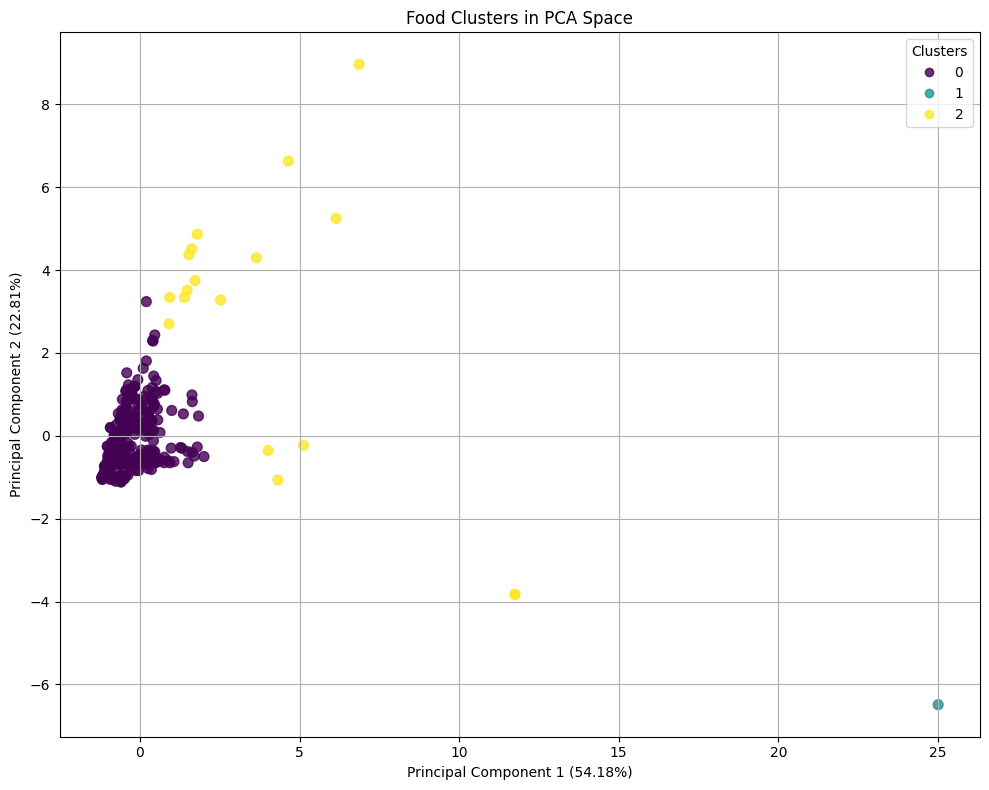

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca_3['PC1'], df_pca_3['PC2'],
                    c=df['Cluster'],
                    cmap='viridis',
                    s=50,
                    alpha=0.8)
plt.xlabel(f'Principal Component 1 ({pca_3.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca_3.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Food Clusters in PCA Space')
plt.grid(True)

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()


## Summary:


*   **Data Preprocessing**: The initial dataset contained 335 entries and 10 columns. Several key nutrient columns ('Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs') were initially identified as `object` data types and contained non-numeric characters and missing values. These columns were successfully converted to numeric types (int64 or float64), with missing values imputed using the mean of each column, and then normalized using `StandardScaler`.
*   **Principal Component Analysis (PCA)**:
    *   PCA was applied to the normalized nutrient data. The first three principal components (PC1, PC2, PC3) collectively explained approximately 87.10% of the total variance in the dataset (PC1: 54.18%, PC2: 22.81%, PC3: 10.11%).
    *   **PC1** primarily represents a combination of protein, fat (especially saturated fat), and fiber content, suggesting foods rich in these macronutrients.
    *   **PC2** largely captures food quantity (grams), total caloric content, and carbohydrate levels.
    *   **PC3** differentiates between calorie-dense, low-volume foods (high fat/calories, low grams/protein/fiber) and nutrient-rich, higher-volume foods (low fat/calories, high grams/protein/fiber).
*   **Optimal Number of Clusters**:
    *   Both the Elbow Method and Silhouette Score were used to determine the optimal number of clusters on the PCA-transformed data (using 3 components).
    *   The Elbow Method strongly suggested **3 clusters**.
    *   The Silhouette Score indicated the highest score at k=2 (approximately 0.889), with k=3 also yielding a relatively high score (approximately 0.699).
    *   Considering a balance between model complexity, interpretability, and the insights from both methods, **3 clusters** were chosen for further analysis.
*   **Dietary Cluster Identification**:
    *   K-Means clustering was applied with 3 clusters, resulting in an imbalanced distribution: Cluster 0 (316 items), Cluster 1 (1 item), and Cluster 2 (18 items).
    *   **Cluster 0 (Low-Calorie, Low-Macronutrient, Moderate Carb Group)**: Characterized by the lowest average values across all major nutrients (Calories, Protein, Fat, Sat.Fat, Fiber, Carbs) and relatively low grams. These foods are generally lighter, lower in overall nutrient density, and often consumed in smaller portions.
    *   **Cluster 2 (High-Calorie, High-Macronutrient Group)**: Displayed significantly higher average values for all nutrients compared to Cluster 0, indicating rich, calorie-dense foods that are substantial sources of protein, fat (including saturated fat), carbohydrates, and fiber.
    *   **Cluster 1** was identified as a strong outlier due to unusually high and uniform nutrient values, suggesting a potential data error or a unique, highly dense single food item.
*   **Visualizations**: A PCA biplot was generated showing the relationship between food items (colored by cluster) and nutrient loadings. A scatter plot of food items colored by their assigned clusters in the PC1 vs. PC2 space was also created, visually confirming the separation of the identified dietary groups.

### Insights or Next Steps

*   **Investigate Outlier Cluster**: Further analysis of Cluster 1 is warranted to determine if it represents a data anomaly, a data entry error, or a legitimate but extremely unique food item that might need special handling or exclusion from certain aggregate analyses.
*   **Refine Clustering for Specific Goals**: While 3 clusters provide good interpretability, if the primary goal is to maximize cluster separation, re-evaluating with 2 clusters (as suggested by the highest Silhouette Score) could be considered. This choice would depend on the specific dietary insights required.
